Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df = df.dropna(subset=['date_added', 'rating'])
#Изменим формат дат
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",8,2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,8,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9


Text(0.5, 1.0, 'Type')

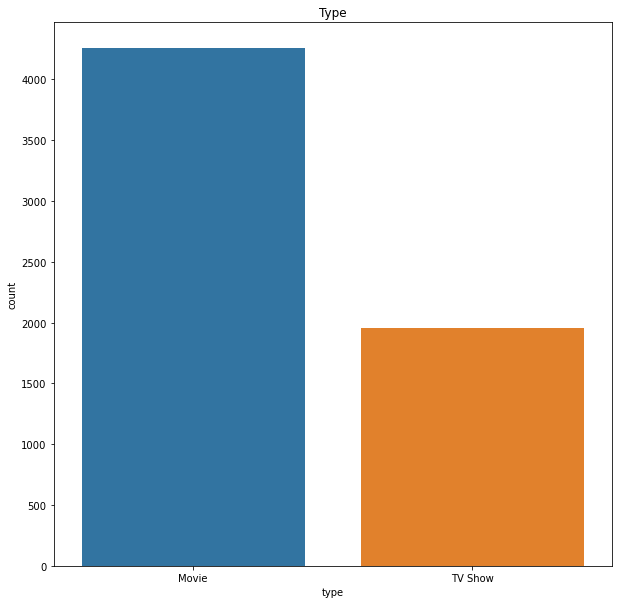

In [8]:
#Сравним количество фильмов и шоу
sns.countplot(df['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

In [9]:
#Распределение выходов фильмов и шоу по годам

df_year=df.groupby(["year_added", "type"])["title"].count()
df_year.head()

year_added  type   
2008        Movie       1
            TV Show     1
2009        Movie       2
2010        Movie       1
2011        Movie      13
Name: title, dtype: int64

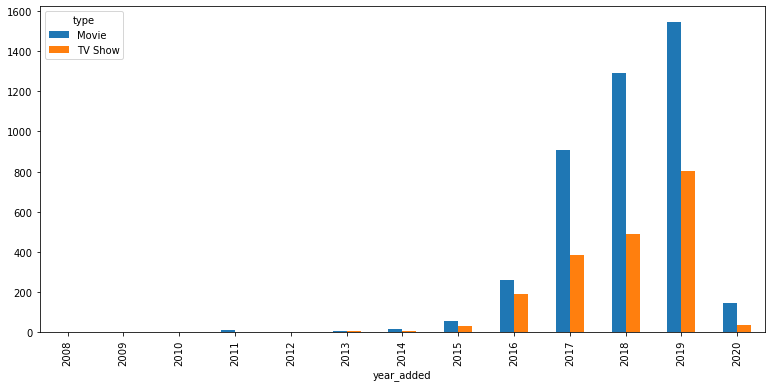

In [10]:
df_year.unstack().plot(kind='bar')

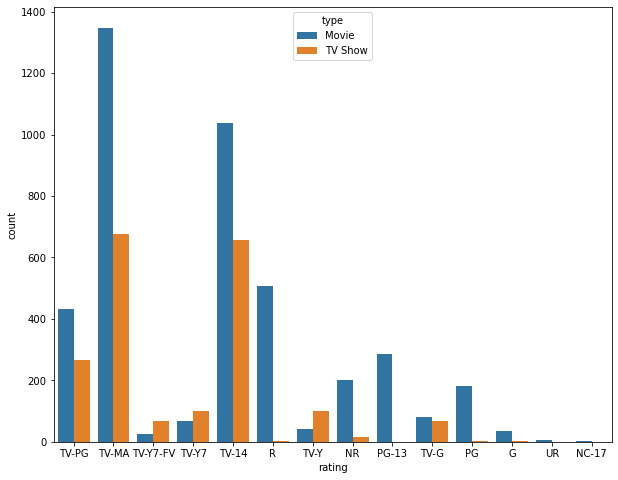

In [11]:
#Зависимость между рейтингом и типом контента
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)


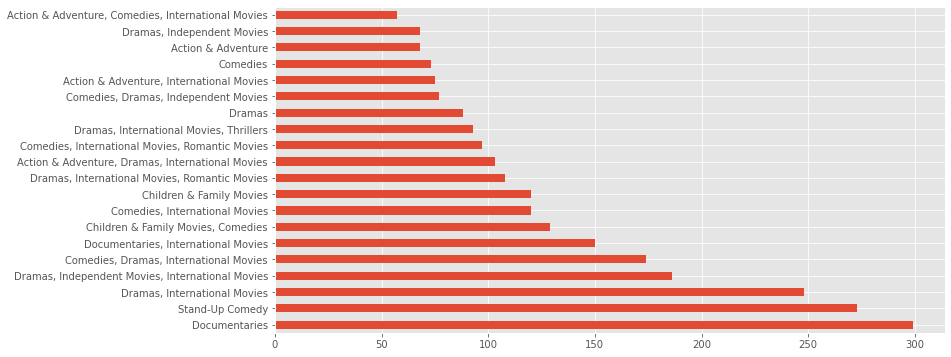

In [12]:
#Распределение по самым популярным жанрам фильмов
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:20].plot(kind="barh")

In [13]:
#Анализ выхода фильмов и шоу по месяцам и годам
df_date = df.pivot_table(
                        index='month_added', 
                        columns='year_added', 
                        values='title', 
                        aggfunc=lambda x: len(x.unique())).fillna(0).applymap(float)

df_date

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month_added,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,44.0,73.0,137.0,167.0,184.0
2,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,16.0,87.0,92.0,174.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,19.0,145.0,180.0,197.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,22.0,98.0,132.0,183.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,14.0,114.0,108.0,183.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,96.0,81.0,189.0,0.0
7,0.0,0.0,0.0,0.0,2.0,0.0,1.0,8.0,31.0,82.0,164.0,186.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,43.0,118.0,179.0,163.0,0.0
9,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,47.0,124.0,134.0,162.0,0.0


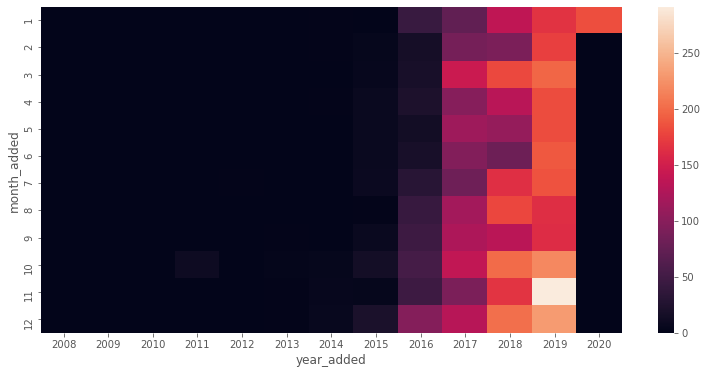

In [14]:
ax = sns.heatmap(df_date)